In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import copy

In [2]:
LANGUAGES = ['English', 'Ganda', 'French', 'Gujarati', 'Indonesian' ,'Korean', 'Russian']

In [3]:
ASR_TYPE = "MS Azure"
TRANSFORMATION_TYPES = ["Amplitude", "Clipping", "Drop", "Frame", "HP", "LP", "Noise", "Scale"]
TRANSFORMATION_TYPE = "Noise"


In [4]:
def get_file_data(asr_type = ASR_TYPE, transformation_type = TRANSFORMATION_TYPE):
    file_name = asr_type + "/" + asr_type + " Word Counts - " + transformation_type + ".csv"
    with open(file_name, newline='') as csvfile:
        reader = csv.reader(csvfile, delimiter=',')
        file_arr = list(reader)
    return file_arr, asr_type, transformation_type

In [5]:
def get_read_rows(initial_drop_loc= 11, gap = 9, num_langs = 7, transformation_type = TRANSFORMATION_TYPE):
    if(transformation_type == "Amplitude"):
        initial_drop_loc = 12
        gap = 10
    read_rows = list(range(initial_drop_loc - 1, initial_drop_loc - 1 + gap * num_langs, gap))
    return read_rows

In [6]:
def process_word_arr(word_arr):
    word_arr = word_arr[1:len(word_arr) - 1]
    return [i[:-1] for i in word_arr]

In [7]:
def process_num_arr(num_arr):
    num_arr = num_arr[1:len(num_arr) - 1]
    return [int(i) for i in num_arr]

In [8]:
FILE_ARR, _ , _ = get_file_data()
READ_ROWS = get_read_rows()

In [9]:
# word_arr = file_arr[0]
WORD_ARR = process_word_arr(FILE_ARR[0])


In [10]:
def get_word_drops_arr(file_arr = FILE_ARR, word_arr = WORD_ARR, read_rows = READ_ROWS, 
                       languages = LANGUAGES, sorted_arr=True, lang_val = 0):
    num_arr = (process_num_arr(file_arr[read_rows[lang_val]]))
    word_num_arr = []
    for i, val in enumerate(num_arr):
        word_num_arr.append((word_arr[i], val))
    if(sorted_arr):
        word_num_arr.sort(key=lambda tup: tup[1], reverse=True)
        return languages[lang_val], word_num_arr
    else:
        return languages[lang_val], word_num_arr

In [11]:
print(get_word_drops_arr(lang_val=0))

('English', [('thick', 3), ('slabs', 3), ('her', 2), ('of', 2), ('we', 2), ('can', 2), ('things', 1), ('bob', 1), ('frog', 1), ('she', 1), ('scoop', 1), ('into', 1), ('bags', 1), ('will', 1), ('go', 1), ('meet', 1), ('please', 0), ('call', 0), ('stella', 0), ('ask', 0), ('to', 0), ('bring', 0), ('these', 0), ('with', 0), ('from', 0), ('the', 0), ('store', 0), ('six', 0), ('spoons', 0), ('fresh', 0), ('snow', 0), ('peas', 0), ('five', 0), ('blue', 0), ('cheese', 0), ('and', 0), ('maybe', 0), ('a', 0), ('snack', 0), ('for', 0), ('brother', 0), ('also', 0), ('need', 0), ('small', 0), ('plastic', 0), ('snake', 0), ('big', 0), ('toy', 0), ('kids', 0), ('three', 0), ('red', 0), ('wednesday', 0), ('at', 0), ('train', 0), ('station', 0)])


In [12]:
def get_word_drop_averages(file_arr = FILE_ARR, word_arr = WORD_ARR, read_rows = READ_ROWS, 
                       languages = LANGUAGES, lang_val = 0):
    num_arr = (process_num_arr(file_arr[read_rows[lang_val]]))
    return np.mean(num_arr)

In [13]:
ASR_TYPES = ["MS Azure", "GCP", "IBM"]

In [18]:
def autolabel(rects):
    
    
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        
        text_height = height + 0.02*height
#         if dataset_type == DATASET_TYPES[0]:
    
#         elif dataset_type == DATASET_TYPES[1]:
#             text_height = height + max(0.02*height, 0.5)

#         else:
#             text_height = height + max(0.02*height, 3)
            
        ax.text(rect.get_x() + rect.get_width()/2., text_height,
                '%d' % int(height),
                ha='center', va='bottom', rotation="vertical")

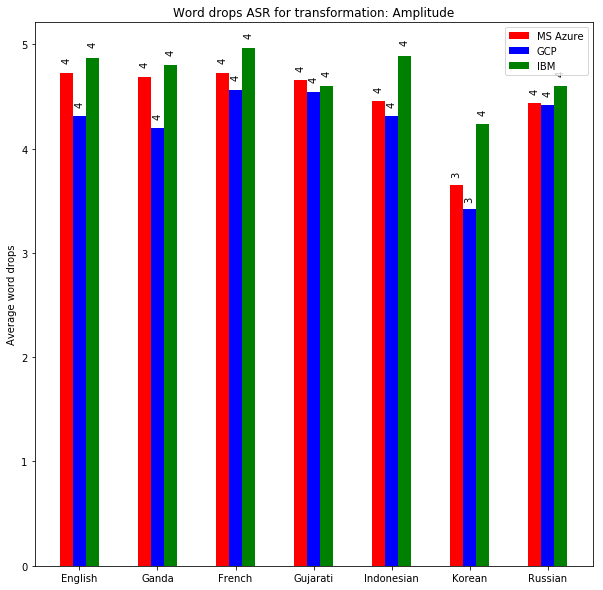

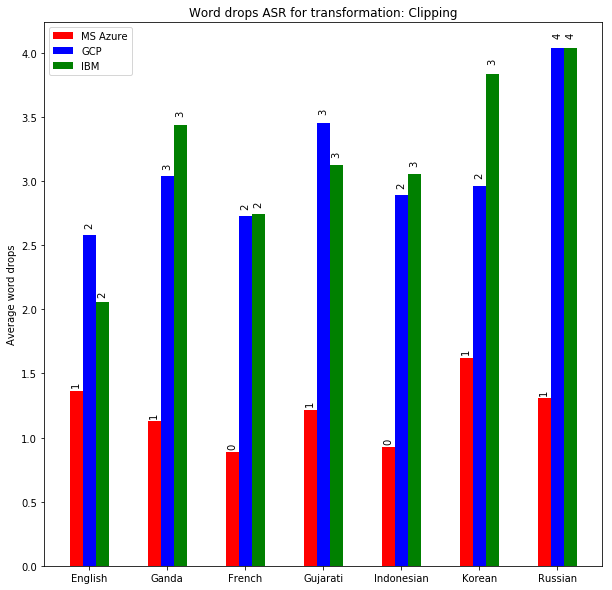

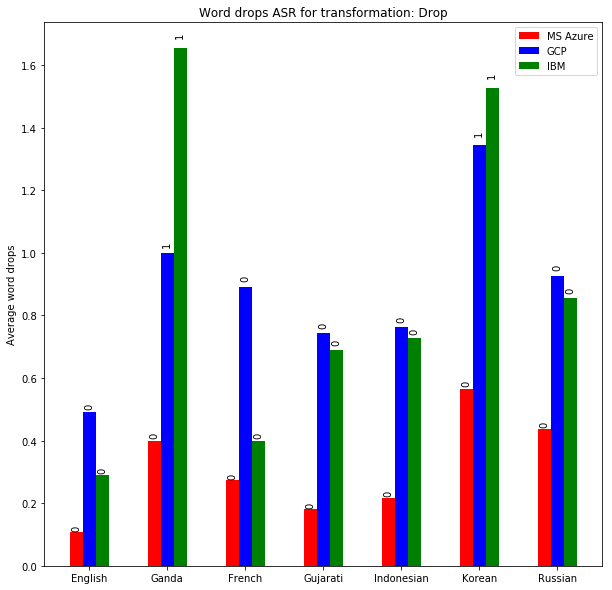

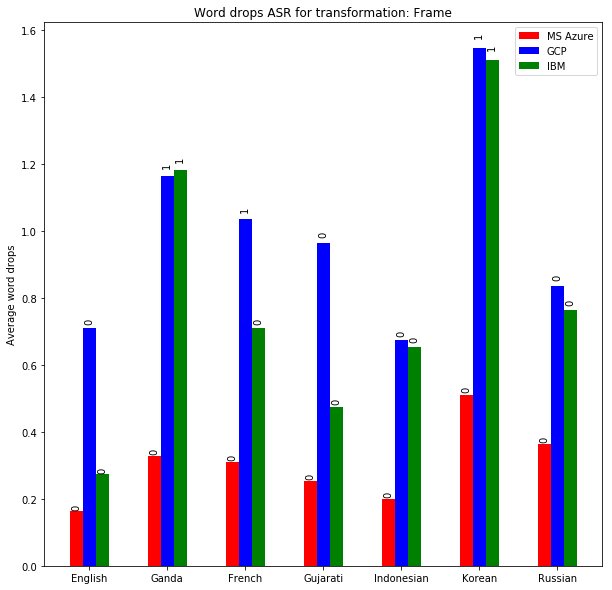

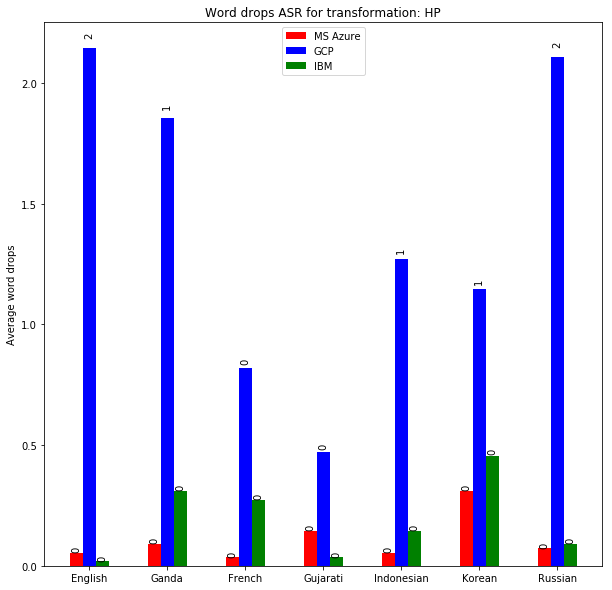

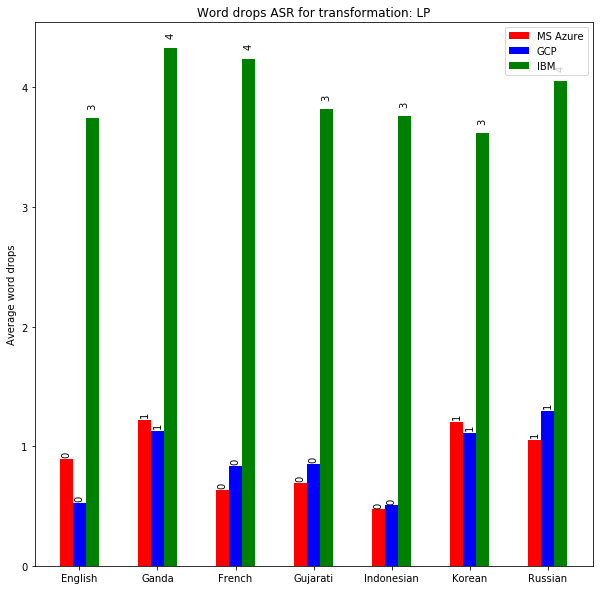

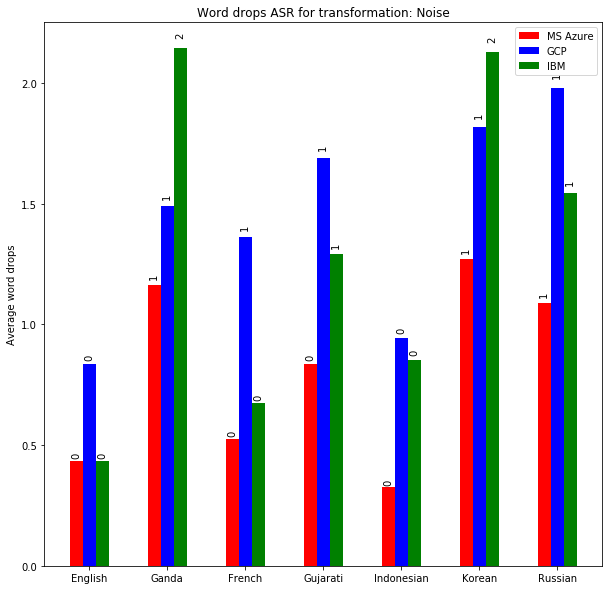

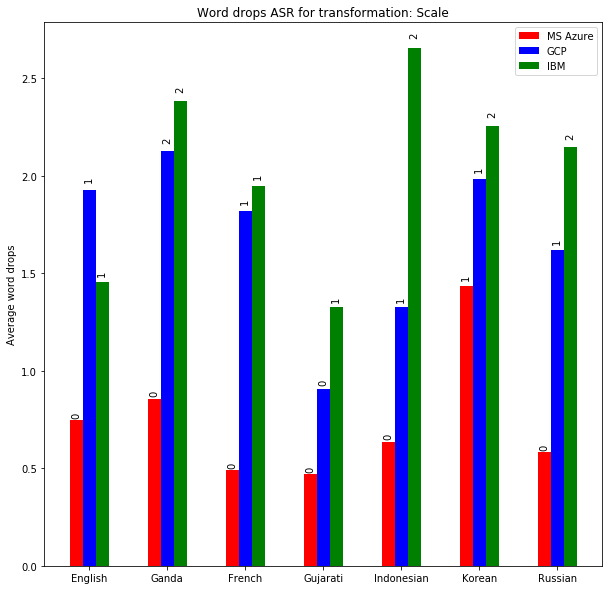

In [19]:
for tr_type in TRANSFORMATION_TYPES:
    asr_error_dict = {}
    for asr_type in ASR_TYPES:
        file_arr_, _ , _ = get_file_data(asr_type=asr_type, transformation_type=tr_type)
    #     print(tr_type, asr_type)
        error_row = []
        for i, lang in enumerate(LANGUAGES):
            error_row.append(get_word_drop_averages(file_arr = file_arr_, lang_val = i))
        asr_error_dict[asr_type] = error_row
#     print(asr_error_dict)

    width = 0.25
    # spacing = 0.2
    colors = ['r', 'b', 'g', 'y', 'c', 'm', 'k', 'tab:orange']
    asr_vals = ASR_TYPES
    step_size = 1.5

    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111)

    N = len(LANGUAGES)
    ind = np.arange(N * step_size, step = step_size) 


    rects = []

    sum_arrs = []
    for i, asr_type in enumerate(asr_vals):
        sum_arr = asr_error_dict[asr_type]
        sum_arrs.append(sum_arr)
        rects.append(ax.bar(ind + width*i, sum_arr, width = width, color=colors[i]))
        
    for rect in rects:
        autolabel(rect)

    ax.legend((rect for rect in rects), (asr_type for asr_type in ASR_TYPES))
    ax.set_xticks(ind + width * 1)
    ax.set_xticklabels( LANGUAGES)
    ax.set_ylabel('Average word drops')
    plt.title ("Word drops ASR for transformation: " + tr_type)
    plt.show()

[4.636363636363637, 4.5636363636363635, 4.751515151515151, 4.6, 4.551515151515152, 3.7696969696969695, 4.484848484848485]


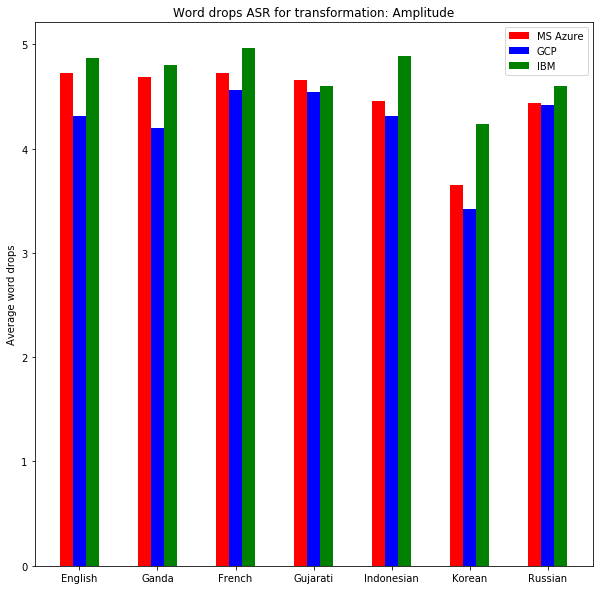

[2.0, 2.533333333333333, 2.121212121212121, 2.6, 2.290909090909091, 2.806060606060606, 3.1272727272727274]


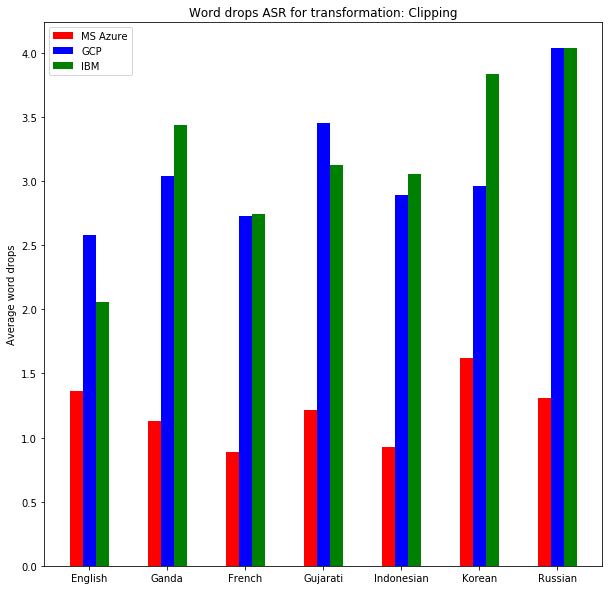

[0.29696969696969694, 1.0181818181818183, 0.5212121212121211, 0.5393939393939394, 0.5696969696969697, 1.1454545454545455, 0.7393939393939393]


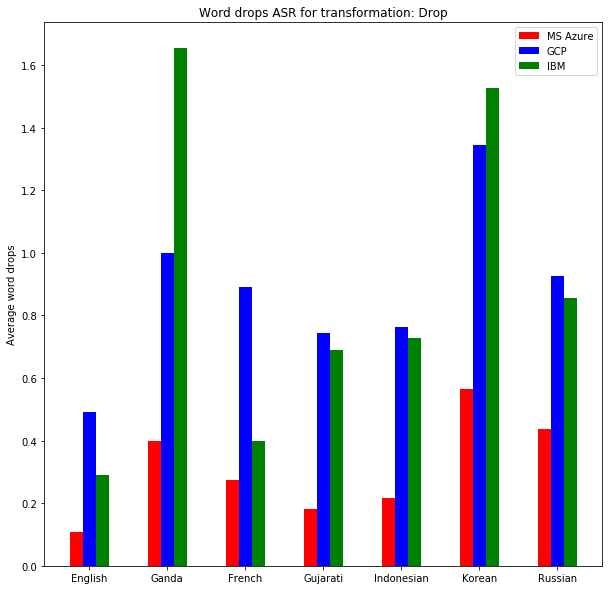

[0.38181818181818183, 0.890909090909091, 0.6848484848484849, 0.5636363636363636, 0.5090909090909091, 1.1878787878787878, 0.6545454545454545]


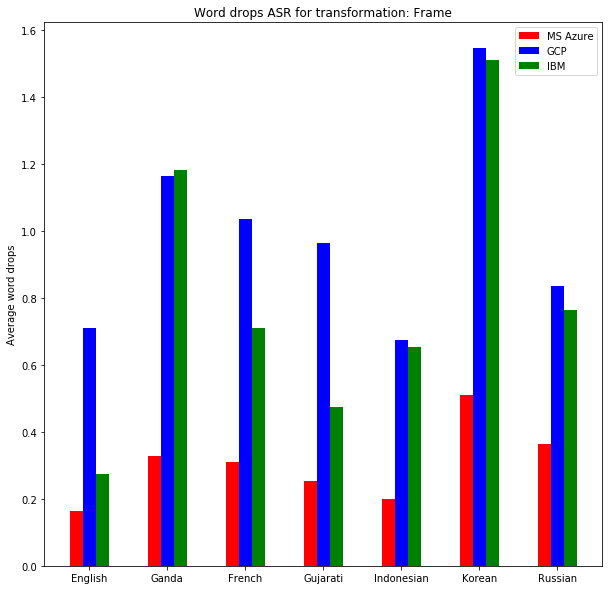

[0.7393939393939394, 0.7515151515151515, 0.3757575757575758, 0.21818181818181817, 0.4909090909090909, 0.6363636363636364, 0.7575757575757575]


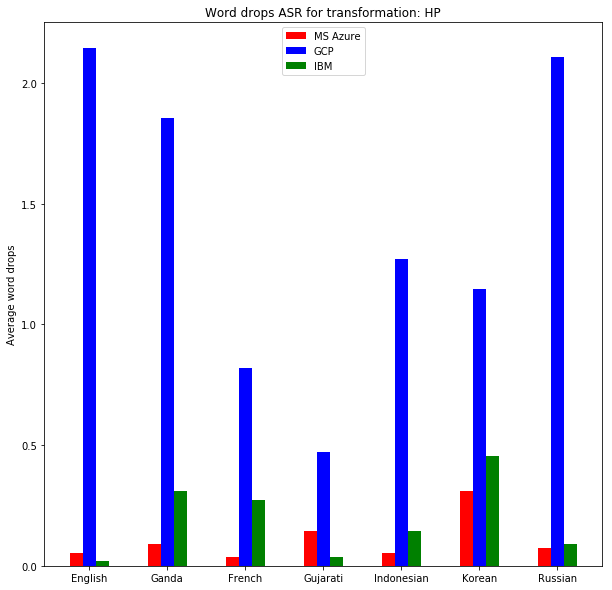

[1.7212121212121214, 2.224242424242424, 1.903030303030303, 1.7878787878787878, 1.5818181818181818, 1.9757575757575758, 2.1333333333333333]


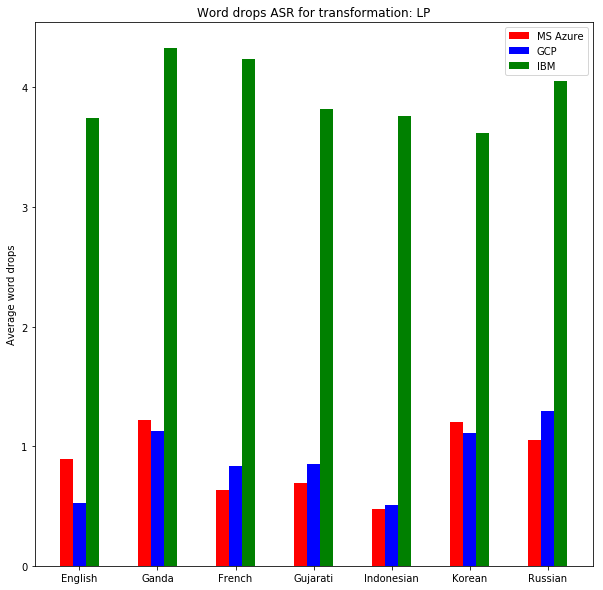

[0.5696969696969697, 1.5999999999999999, 0.8545454545454545, 1.2727272727272727, 0.709090909090909, 1.7393939393939395, 1.5393939393939393]


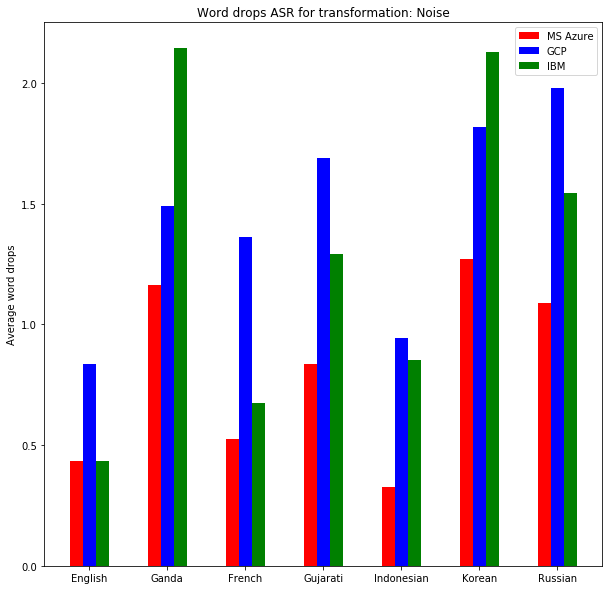

[1.3757575757575757, 1.7878787878787878, 1.4181818181818182, 0.903030303030303, 1.5393939393939398, 1.8909090909090907, 1.4484848484848485]


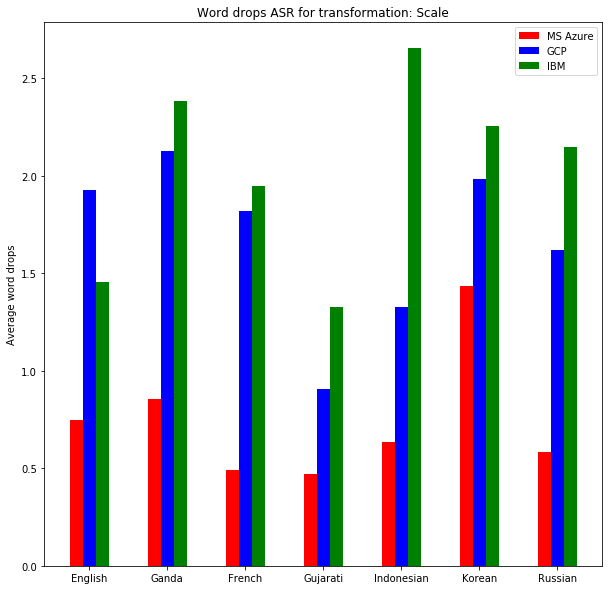

In [15]:
for tr_type in TRANSFORMATION_TYPES:
    asr_error_dict = {}
    for asr_type in ASR_TYPES:
        file_arr_, _ , _ = get_file_data(asr_type=asr_type, transformation_type=tr_type)
    #     print(tr_type, asr_type)
        error_row = []
        for i, lang in enumerate(LANGUAGES):
            error_row.append(get_word_drop_averages(file_arr = file_arr_, lang_val = i))
        asr_error_dict[asr_type] = error_row
#     print(asr_error_dict)
      
    
    average_arr = [np.mean([asr_error_dict[k][i] for k in ASR_TYPES]) for i in range(len(LANGUAGES))]
    print(average_arr)
            

    width = 0.25
    # spacing = 0.2
    colors = ['r', 'b', 'g', 'y', 'c', 'm', 'k', 'tab:orange']
    asr_vals = ASR_TYPES
    step_size = 1.5

    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111)

    N = len(LANGUAGES)
    ind = np.arange(N * step_size, step = step_size) 


    rects = []

    sum_arrs = []
    for i, asr_type in enumerate(asr_vals):
        sum_arr = asr_error_dict[asr_type]
        sum_arrs.append(sum_arr)
        rects.append(ax.bar(ind + width*i, sum_arr, width = width, color=colors[i]))

    ax.legend((rect for rect in rects), (asr_type for asr_type in ASR_TYPES))
    ax.set_xticks(ind + width * 1)
    ax.set_xticklabels( LANGUAGES)
    ax.set_ylabel('Average word drops')
    plt.title ("Word drops ASR for transformation: " + tr_type)
    plt.show()